# NOTE TO WHOEVER EDITING NEXT
In order to save your time, I wrote to csv our cleaned data sets
- Just run the first cell (import stuff)
- Then go straight to DATA VISUALIZATION, you'll see a code box that reads in 2 csv files, uncomment those and boom, you got the two datasets that you need to move forward :>

__Summary of things I changed__
1. I added a bar plot that shows US has the most starbucks (as requested from last week's meeting)
2. Fix how we standardize zipcodes because our previous method results in NaN zipcodes
3. Add data visualizations for age and income
4. Rename `df_US` to `df_starbucks_US` sorry :(

# COGS 108 - TEAM 44: FINAL PROJECT

# Overview
Today we live in a society where businesses are greatly impacted by customer reviews and the location of where their businesses are. For some businesses, this can result in their success or failure. Looking to improve the experience for owners and customers, we used the yelp’s open-source dataset, _____, and _____ dataset to try to predict and determine what locations are better or worse for the chain Starbucks’ in California. It is important when opening a restaurant or a chain to consider where to open to make the most profit and build an image. Of course, when we look into Starbucks, we can tell that their goal is to open as many stores as they can. With our data analysis, however, we can hopefully give further insight to chains such as Starbucks to help them be the most efficient, even if they want to open as many stores as possible


# Group Member IDs and Names 

U08273331 Baichuan Tang

A14394510 Catherine Wang

A14881312 Jian Fan

A12426296 Kim Pham

A15212562 Ryan Eveloff

# Research Question

Our project sets out to predict *the best location(s) to open the next Starbucks*.
And to answer that question, we will be looking at Starbucks store data and how that maps to Census demographics to develop a "profile" (list of criteria) of a city where Starbucks is likely to expand its business. Using this "profile", we will produce a list of potential cities meeting those criteria.


# Background and Prior Work

Before diving into the real nitty-gritty code work, we did some research to best assist us. First, to stress the importance of our project, we looked at how Starbucks has been employing technology to its favor: in a recent <a href="https://www.geekwire.com/2019/microsoft-teams-starbucks-predictive-drive-thru-ordering-bean-cup-blockchain/">collaboration</a> with Microsoft, they use machine learning to gather customer preferences, connecting coffeemakers in stores to the internet to blockchain services for tracing coffee. They are talking about the increased hiring of software engineers at companies outside the industry that are embracing high tech solutions. This is important for our project because we are using data science to figure out how the relationships and concepts we learn from our data can help a company and franchise like Starbucks. If we are able to find factors that affect and optimize a certain location for Starbucks to open, it can be really useful for companies that can benefit from data scientists and software engineers.
Fortunately a <a href="https://pdfs.semanticscholar.org/00b4/46b1a605c29326690d8c038c30030b7342cd.pdf">study</a> by Chungyu Institute of Technology provides us some pointers. It suggested that "Starbucks Coffee should also pay more attention to male, young customers who are under 35 years old, and consumers who have a high school diploma or equivalent and associate
degree for increasing market share." Therefore we will be analyzing factors such as gender, age, and education level to see if there's a correlation (if any) between certain demographics, the locations established by Starbucks, and its success in those locations.

Additionally, we found a similar <a href="https://towardsdatascience.com/analyzing-and-predicting-starbucks-location-strategy-3c5026d31c21?fbclid=IwAR2F6BPuAQfFJU9OXS5WQaSlv2zuB6wPl89WXqU5ORcaPfq-2rtMH-2zOfA">project</a> in R done by Jordan Bean. He is someone that is naturally curious about how Starbucks think about location selection, and how their store locations can reveal their customer base and how they view locations as more attractive than others. His project is similar to our project in many ways because we also want to look into the locations of Starbucks. However, we want to focus on generating an idea of where Starbucks locations can be and are most successful, not necessarily what Starbucks themselves plan when choosing a location to open their stores. Jordan Bean usefully uses zip codes to differentiate locations of Starbucks just like us too. 

References (include links):
- 1) Starbucks' collaboration with Microsoft: https://www.geekwire.com/2019/microsoft-teams-starbucks-predictive-drive-thru-ordering-bean-cup-blockchain/
- 2) Jordan Bean's article: https://towardsdatascience.com/analyzing-and-predicting-starbucks-location-strategy-3c5026d31c21?fbclid=IwAR2F6BPuAQfFJU9OXS5WQaSlv2zuB6wPl89WXqU5ORcaPfq-2rtMH-2zOfA
- 3) Study: https://pdfs.semanticscholar.org/00b4/46b1a605c29326690d8c038c30030b7342cd.pdf

# Hypothesis


Our project primarily focuses on determining the relationship between Starbucks success in established locations and associated demographic factors such as gender, age, income, houseprice, and education level. We predict that there will be a positive correlation among the factors stated above.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

For Analysis and Results, we must install geopandas, lippysal, mapclassify, and dill. The following code box is commented out because we only needed to install them once.

In [ ]:
#!pip install geopandas
#!pip install libpysal
#!pip install mapclassify
#!pip install dill
#!pip install descartes
#!pip install census
#!pip install us
#!pip install censusdata

In [1]:
# Imports

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from census import Census
from us import states
import censusdata

# Erase warnings
import warnings
warnings.filterwarnings("ignore")

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

#For geo infomation processing
import geopandas as gpd
import libpysal
import mapclassify
from shapely.geometry import Point

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning
Data files:
    - Starbucks store_data.csv
    - Census 

## a) Starbucks: Load Data
Import data into a DataFrame structure called `df_starbucks`

In [41]:
df_starbucks=pd.read_csv('store_data.csv')
df_starbucks

,Brand,Store Number,Store Name,Ownership Type,...,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,...,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,...,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,...,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
...,...,...,...,...,...,...,...,...,...
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,...,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,...,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79
25599,Starbucks,47609-253286,Mall of Africa,Licensed,...,27873500215,GMT+000000 Africa/Johannesburg,28.11,-26.02


We want to create a map to visualize, therefore we need a Longitude and Latitude component to create a geometry column that has points of Longitude and Latitude for every existing Starbucks.

In [42]:
geometry=pd.Series()
for i in df_starbucks.index:
    geometry.loc[i]=Point((df_starbucks.loc[i,'Longitude'],df_starbucks.loc[i,'Latitude']))
df_starbucks['geometry']=geometry
df_starbucks

,Brand,Store Number,Store Name,Ownership Type,...,Timezone,Longitude,Latitude,geometry
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,...,GMT+1:00 Europe/Andorra,1.53,42.51,POINT (1.53 42.51)
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,...,GMT+04:00 Asia/Dubai,55.47,25.42,POINT (55.47 25.42)
2,Starbucks,47089-256771,Dana Mall,Licensed,...,GMT+04:00 Asia/Dubai,55.47,25.39,POINT (55.47 25.39)
...,...,...,...,...,...,...,...,...,...
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,...,GMT+000000 Africa/Johannesburg,28.04,-26.15,POINT (28.04 -26.15)
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,...,GMT+000000 Africa/Johannesburg,28.28,-25.79,POINT (28.28 -25.79)
25599,Starbucks,47609-253286,Mall of Africa,Licensed,...,GMT+000000 Africa/Johannesburg,28.11,-26.02,POINT (28.11 -26.02)


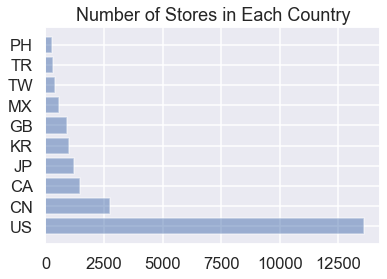

In [79]:
#get count of starbucks in each country
top10country=starbucks.groupby('Country').apply(lambda x:len(x)).sort_values(ascending=False)[:10]
#draw horizontal bar chart
y_pos = np.arange(len(top10country))
plt.barh(y_pos, top10country.values, align='center', alpha=0.5)
plt.yticks(y_pos, top10country.index)
#plt.xlabel('Usage')
plt.title('Number of Stores in Each Country')

plt.show()

Seeing that there are exceptionally huge amount of Starbucks in the US, we will focus our analysis on to just those Starbucks. Store data in `df_starbucks_US`

In [43]:
df_starbucks_US = df_starbucks[df_starbucks['Country']=='US']
print("There are %s Starbucks in the US"%len(df_starbucks_US))
df_starbucks_US

There are 13608 Starbucks in the US


,Brand,Store Number,Store Name,Ownership Type,...,Timezone,Longitude,Latitude,geometry
11964,Starbucks,3513-125945,Safeway-Anchorage #1809,Licensed,...,GMT-09:00 America/Anchorage,-149.78,61.21,POINT (-149.78 61.21)
11965,Starbucks,74352-84449,Safeway-Anchorage #2628,Licensed,...,GMT-09:00 America/Anchorage,-149.84,61.14,POINT (-149.84 61.14)
11966,Starbucks,12449-152385,Safeway - Anchorage #1813,Licensed,...,GMT-09:00 America/Anchorage,-149.85,61.11,POINT (-149.85 61.11)
...,...,...,...,...,...,...,...,...,...
25569,Starbucks,22425-219024,Laramie - Grand & 30th,Company Owned,...,GMT-07:00 America/Denver,-105.56,41.31,POINT (-105.56 41.31)
25570,Starbucks,10849-103163,I-80 & Dewar Dr-Rock Springs,Company Owned,...,GMT-07:00 America/Denver,-109.25,41.58,POINT (-109.25 41.58)
25571,Starbucks,10769-102454,Coffeen & Brundage Lane-Sheridan,Company Owned,...,GMT-07:00 America/Denver,-106.94,44.77,POINT (-106.94 44.77)


Narrow down even more to have the table only contain information we need. In other words, drop columns "Brand" (obviously they're all Starbucks), "Store Number", "Ownership Type", "Country", "Phone Number", and "Timezone".

In [44]:
df_starbucks_US = df_starbucks_US.drop(columns=['Brand','Store Number','Ownership Type','Country','Phone Number','Timezone','Longitude','Latitude'])
#reseting index to start from 0
df_starbucks_US.reset_index(drop=True,inplace=True)
#Rename some columns to have simpler name
df_starbucks_US=df_starbucks_US.rename({'State/Province':'State','Postcode':'zip'}, axis='columns')
df_starbucks_US

,Store Name,Street Address,City,State,zip,geometry
0,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,Anchorage,AK,995042300,POINT (-149.78 61.21)
1,Safeway-Anchorage #2628,1725 Abbott Rd,Anchorage,AK,995073444,POINT (-149.84 61.14)
2,Safeway - Anchorage #1813,1501 Huffman Rd,Anchorage,AK,995153596,POINT (-149.85 61.11)
...,...,...,...,...,...,...
13605,Laramie - Grand & 30th,3021 Grand Ave,Laramie,WY,82070,POINT (-105.56 41.31)
13606,I-80 & Dewar Dr-Rock Springs,118 Westland Way,Rock Springs,WY,829015751,POINT (-109.25 41.58)
13607,Coffeen & Brundage Lane-Sheridan,2208 Coffeen Ave,Sheridian,WY,828016213,POINT (-106.94 44.77)


## b) Starbucks: Find Missing Data
Drop rows with missing data. We will try to minimize the number of rows dropped to maximize our prediction accuracy. Therefore we will only drop rows with missing data in the following columns "Store Number", "Ownership Type", "City", "State", and "Zip" because they are of importance to our analysis.

In [45]:
df_starbucks_US = df_starbucks_US.dropna(subset=['City','State','zip'])
df_starbucks_US

,Store Name,Street Address,City,State,zip,geometry
0,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,Anchorage,AK,995042300,POINT (-149.78 61.21)
1,Safeway-Anchorage #2628,1725 Abbott Rd,Anchorage,AK,995073444,POINT (-149.84 61.14)
2,Safeway - Anchorage #1813,1501 Huffman Rd,Anchorage,AK,995153596,POINT (-149.85 61.11)
...,...,...,...,...,...,...
13605,Laramie - Grand & 30th,3021 Grand Ave,Laramie,WY,82070,POINT (-105.56 41.31)
13606,I-80 & Dewar Dr-Rock Springs,118 Westland Way,Rock Springs,WY,829015751,POINT (-109.25 41.58)
13607,Coffeen & Brundage Lane-Sheridan,2208 Coffeen Ave,Sheridian,WY,828016213,POINT (-106.94 44.77)


## c) Starbucks: Standardize Zip Codes
We can see that some zipcodes have 9 digits, some have 5, some have less than 4. We will standardize them to have 5 digits.

In [46]:
def standardize_zip (zip):
    if len(zip) < 5:
        #prepend 0's to shorter zipcodes
        newzip = zip.zfill(5)
    else:
        newzip = str(zip)
        #cut longer zipcodes to 5-digits
        newzip = zip[:5]
    return newzip        

In [15]:
# Test function:
print('INPUT', '\t\t-\t', 'OUTPUT')
for inp in ['828016213', '92843', '06608', '066081234', '501','1035']:
    print('{:10s} \t-\t {:10s}'.format(inp, standardize_zip(inp)))

INPUT 		-	 OUTPUT
828016213  	-	 82801     
92843      	-	 92843     
06608      	-	 06608     
066081234  	-	 06608     
501        	-	 00501     
1035       	-	 01035     


In [47]:
df_starbucks_US['zip'] = df_starbucks_US['zip'].apply(standardize_zip)
df_starbucks_US

,Store Name,Street Address,City,State,zip,geometry
0,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,Anchorage,AK,99504,POINT (-149.78 61.21)
1,Safeway-Anchorage #2628,1725 Abbott Rd,Anchorage,AK,99507,POINT (-149.84 61.14)
2,Safeway - Anchorage #1813,1501 Huffman Rd,Anchorage,AK,99515,POINT (-149.85 61.11)
...,...,...,...,...,...,...
13605,Laramie - Grand & 30th,3021 Grand Ave,Laramie,WY,82070,POINT (-105.56 41.31)
13606,I-80 & Dewar Dr-Rock Springs,118 Westland Way,Rock Springs,WY,82901,POINT (-109.25 41.58)
13607,Coffeen & Brundage Lane-Sheridan,2208 Coffeen Ave,Sheridian,WY,82801,POINT (-106.94 44.77)


In [48]:
#write to csv for easier access next runs
#df_starbucks_US.to_csv('df_starbucks_US.csv', index=False)

## d) Census: Import and Putting Data Into Comprehensive Table

In [49]:
# Obtain a census API key to access the information about population in each state
c = Census("d05cc8c102603c7b50d7705c8f45251177e6346b")

In [50]:
# Creating a dict that matches ids to real values. More information can be found here:
# https://api.census.gov/data/2016/acs/acs1/variables.html
info_dict = dict(male_15_17 = 'B01001_006E',
male_18_19 = 'B01001_007E',
male_20 = 'B01001_008E',
male_21 = 'B01001_009E',
male_22_24 = 'B01001_010E',
male_25_29 = 'B01001_011E',
male_30_34 = 'B01001_012E',
male_35_39 = 'B01001_013E',
male_40_44 = 'B01001_014E',
male_45_49 = 'B01001_015E',
male_50_54 = 'B01001_016E',
male_55_59 = 'B01001_017E',
male_60_61 = 'B01001_018E',
male_62_64 = 'B01001_019E',
male_65_66 = 'B01001_020E',
male_67_69 = 'B01001_021E',
male_70_74 = 'B01001_022E',
male_75_79 = 'B01001_023E',
male_80_84 = 'B01001_024E',
male_85_plus = 'B01001_025E',
female_15_17 = 'B01001_030E',
female_18_19 = 'B01001_031E',
female_20 = 'B01001_032E',
female_21 = 'B01001_033E',
female_22_24 = 'B01001_034E',
female_25_29 = 'B01001_035E',
female_30_34 = 'B01001_036E',
female_35_39 = 'B01001_037E',
female_40_44 = 'B01001_038E',
female_45_49 = 'B01001_039E',
female_50_54 = 'B01001_040E',
female_55_59 = 'B01001_041E',
female_60_61 = 'B01001_042E',
female_62_64 = 'B01001_043E',
female_65_66 = 'B01001_044E',
female_67_69 = 'B01001_045E',
female_70_74 = 'B01001_046E',
female_75_79 = 'B01001_047E',
female_80_84 = 'B01001_048E',
female_85_plus = 'B01001_049E',
median_age = 'B01002_001E', 
median_hh_income = 'B19013_001E',
male_workers = 'B23022_003E',
female_workers = 'B23022_027E',
total_population = 'B01001_001E', 
median_rent = 'B25031_001E',
median_home_value = 'B25077_001E',
high_school_diploma = 'B15003_017E',
bachelors_degree = 'B15003_022E',
masters_degree = 'B15003_023E')
print("There are totally %s raw features selected"%len(info_dict))

There are totally 50 raw features selected


Put data into a DataFrame structure called `df_census`

In [51]:
df_census=pd.DataFrame(c.acs5.zipcode(list(info_dict.values()), Census.ALL))
#because the dataframe's columns' order was not by what we provide('info_dict.values()'), but the order of alphabet
#So we need to re-order it first
cols=list(info_dict.values())
cols.append('zip code tabulation area')
df_census =df_census[cols]
df_census

,B01001_006E,B01001_007E,B01001_008E,B01001_009E,...,B15003_017E,B15003_022E,B15003_023E,zip code tabulation area
0,0.0,0.0,0.0,0.0,...,24.0,35.0,18.0,84306
1,10.0,5.0,0.0,3.0,...,50.0,71.0,58.0,84775
2,0.0,0.0,0.0,0.0,...,83.0,22.0,22.0,84762
...,...,...,...,...,...,...,...,...,...
33117,33.0,42.0,9.0,13.0,...,613.0,388.0,302.0,14840
33118,360.0,162.0,117.0,68.0,...,2839.0,950.0,822.0,14843
33119,51.0,23.0,11.0,6.0,...,428.0,254.0,163.0,14847


Replace census data variables with the dictionary of more meaningful titles we created above

In [52]:
dic=dict(info_dict)
#reverse dict
dic={v:k for k,v in dic.items()}
df_census.rename(dic,axis='columns',inplace=True)
df_census.rename(columns={'zip code tabulation area':'zip'}, inplace=True)
df_census

,male_15_17,male_18_19,male_20,male_21,...,high_school_diploma,bachelors_degree,masters_degree,zip
0,0.0,0.0,0.0,0.0,...,24.0,35.0,18.0,84306
1,10.0,5.0,0.0,3.0,...,50.0,71.0,58.0,84775
2,0.0,0.0,0.0,0.0,...,83.0,22.0,22.0,84762
...,...,...,...,...,...,...,...,...,...
33117,33.0,42.0,9.0,13.0,...,613.0,388.0,302.0,14840
33118,360.0,162.0,117.0,68.0,...,2839.0,950.0,822.0,14843
33119,51.0,23.0,11.0,6.0,...,428.0,254.0,163.0,14847


In [53]:
#write to csv for easier access next runs
#df_census.to_csv('df_census.csv', index=False)

# DATA VISUALIZATION

In [36]:
#read from csvs
#df_census = pd.read_csv('df_census.csv')
#df_starbucks_US = pd.read_csv('df_starbucks_US.csv', dtype={'zip':str})

## a) Visualizing Starbucks "Profile"

DataFrame `df_profile` contains Census information of areas that have Starbucks

In [89]:
df_profile = pd.merge(df_starbucks_US['zip'], df_census, how='left', on='zip')
df_profile

,zip,male_15_17,male_18_19,male_20,...,median_home_value,high_school_diploma,bachelors_degree,masters_degree
0,99504,1068.0,551.0,595.0,...,256400.0,5745.0,5119.0,2131.0
1,99507,630.0,432.0,134.0,...,292400.0,4383.0,5900.0,2237.0
2,99515,591.0,293.0,130.0,...,315600.0,3263.0,3265.0,1235.0
...,...,...,...,...,...,...,...,...,...
13604,82070,216.0,644.0,404.0,...,222600.0,1675.0,3151.0,1633.0
13605,82901,637.0,475.0,138.0,...,201000.0,5071.0,2788.0,940.0
13606,82801,544.0,345.0,245.0,...,233000.0,3427.0,3229.0,1665.0


In [ ]:
#TODO VISUALIZING GENDER (SUGGESTION: MAYBE ADD UP ALL THE MALES AND ALL THE FEMALES -> BAR PLOT)

In [ ]:
#TODO VISUALIZING GENDER+AGE (SUGGESTION: DO A BAR PLOT MALE/FEMALE FOR EACH AGE RANGE)

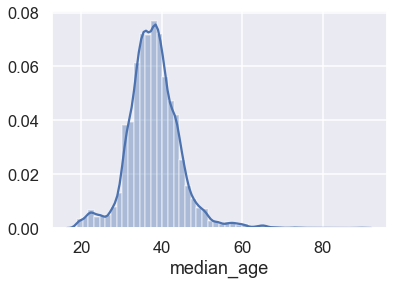

In [91]:
#Removing negative and null values because age cannot be negative
df_profile = df_profile.loc[(df_profile['median_age'] > 0) & (df_profile['median_age'].isnull()==False)]
#draw distribution of age
sns.distplot(df_profile['median_age'])

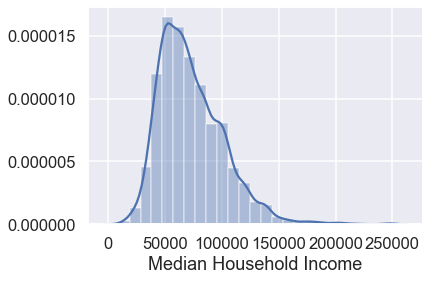

In [96]:
#Removing negative and null values because income cannot be negative
#df_profile = df_profile.loc[(df_profile['median_hh_income'] > 0) & (df_profile['median_hh_income'].isnull()==False)]
#draw distribution of median income
sns.distplot(df_profile['median_hh_income'], axlabel='Median Household Income', bins=25)
#TODO FIX X VALUES TO BE MORE READABLE + MAYBE FIND OUT WHAT THE PEAK IS

In [ ]:
#TODO VISUALIZING EDU LEVEL: MAYBE A BOX PLOT FOR EACH EDU LEVEL

# GEOSPATIAL ANALYSIS

## a) Does Population Affect Number of Starbucks?

In [109]:
popu_dic={'B01001_001E':'total_population'}
df_population=pd.DataFrame(c.acs5.state(list(popu_dic.keys()), Census.ALL))
for i in df_population.index:
    df_population.loc[i,'State']=states.lookup(df_population['state'][i]).abbr
df_population.rename(popu_dic,axis='columns',inplace=True)
df_population['total_population']=df_population['total_population'].apply(float)/10000
df_population

,total_population,state,State
0,346.90,72,PR
1,485.08,01,AL
2,73.86,02,AK
...,...,...,...
49,717.00,53,WA
50,58.32,56,WY
51,576.32,55,WI


In [110]:
geo_table = gpd.read_file(libpysal.examples.get_path('us48.shp'))
df_population=df_population.merge(geo_table,left_on='State',right_on='STATE_ABBR')
df_population

,total_population,state,State,AREA,...,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,485.08,01,AL,12.90,...,01,E S Cen,AL,POLYGON ((-85.07013702392578 31.98054504394531...
1,680.99,04,AZ,28.86,...,04,Mtn,AZ,POLYGON ((-114.5198440551758 33.02766799926758...
2,297.79,05,AR,13.52,...,05,W S Cen,AR,"POLYGON ((-94.46147918701172 34.1966552734375,..."
...,...,...,...,...,...,...,...,...,...
45,717.00,53,WA,20.75,...,53,Pacific,WA,(POLYGON ((-122.400749206543 48.22539520263672...
46,58.32,56,WY,27.97,...,56,Mtn,WY,"POLYGON ((-104.053108215332 41.69824600219727,..."
47,576.32,55,WI,16.48,...,55,E N Cen,WI,(POLYGON ((-87.74845123291016 44.9616279602050...


In [111]:
#since there are so few people in Hawaii and Alaska, and we have very little infomation about these two places, we will 
#be focusing only on the 48 main states.
df_starbucks_US = df_starbucks_US[(df_starbucks_US['State']  !='AK') & (df_starbucks_US['State']  !='HI')]

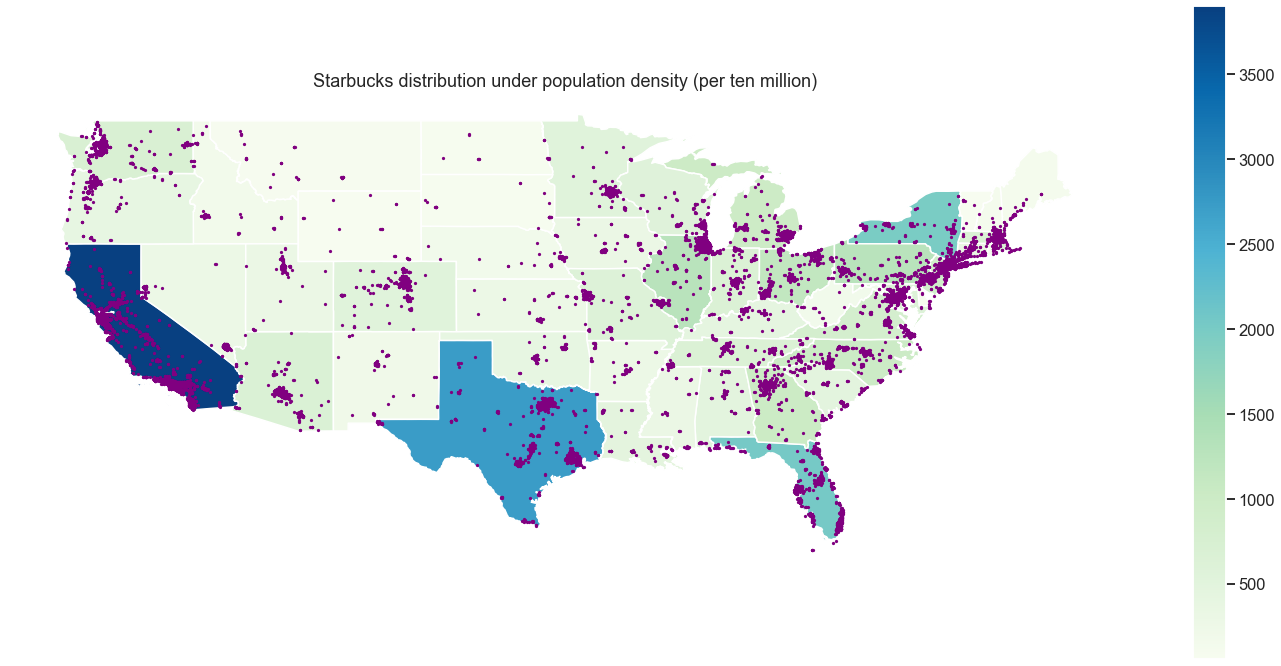

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (25,12))
df_population=gpd.GeoDataFrame(df_population)
df_starbucks_US=gpd.GeoDataFrame(df_starbucks_US)
base=df_population.plot(ax=ax,column='total_population',cmap='GnBu', legend=True)
df_starbucks_US.plot(ax=base,marker='o',color='purple',markersize=3)
plt.axis('off')
plt.title("Starbucks distribution under population density (per ten million)")
plt.show()
# scale: ten million

In [112]:
x=pd.DataFrame(df_starbucks_US['State'].value_counts())
x.columns=['starbucks_count']
x['STATE_ABBR']=x.index
x= x.reset_index(drop=True)
x

,starbucks_count,STATE_ABBR
0,2821,CA
1,1042,TX
2,757,WA
...,...,...
46,23,WY
47,13,ND
48,8,VT


In [113]:
#combine the table with df_population to get the number of starbucks in a state
df_population=pd.merge(df_population,x,on=['STATE_ABBR'])
df_population['population_density']=df_population['total_population']/df_population['AREA']
df_population

,total_population,state,State,AREA,...,STATE_ABBR,geometry,starbucks_count,population_density
0,485.08,01,AL,12.90,...,AL,POLYGON ((-85.07013702392578 31.98054504394531...,85,37.61
1,680.99,04,AZ,28.86,...,AZ,POLYGON ((-114.5198440551758 33.02766799926758...,488,23.60
2,297.79,05,AR,13.52,...,AR,"POLYGON ((-94.46147918701172 34.1966552734375,...",55,22.03
...,...,...,...,...,...,...,...,...,...
45,717.00,53,WA,20.75,...,WA,(POLYGON ((-122.400749206543 48.22539520263672...,757,34.55
46,58.32,56,WY,27.97,...,WY,"POLYGON ((-104.053108215332 41.69824600219727,...",23,2.09
47,576.32,55,WI,16.48,...,WI,(POLYGON ((-87.74845123291016 44.9616279602050...,145,34.98


In [114]:
import patsy
import statsmodels.api as sm
outcome_1, predictors_1=patsy.dmatrices('starbucks_count~population_density',df_population)
print(sm.OLS(outcome_1, predictors_1).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        starbucks_count   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3724
Date:                Sat, 08 Jun 2019   Prob (F-statistic):              0.545
Time:                        03:39:29   Log-Likelihood:                -359.42
No. Observations:                  48   AIC:                             722.8
Df Residuals:                      46   BIC:                             726.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            248.3082     80

In [115]:
outcome_2, predictors_2=patsy.dmatrices('starbucks_count~total_population',df_population)
print(sm.OLS(outcome_2, predictors_2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        starbucks_count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     206.2
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           1.30e-18
Time:                        03:39:33   Log-Likelihood:                -318.77
No. Observations:                  48   AIC:                             641.5
Df Residuals:                      46   BIC:                             645.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -82.6800     37.138  

According to p value, which is high, population density does not significantly predict number of starbucks,but total population can(not advisable to some extent)

# ols regression for other variables

In [68]:
#Here also for other variables, do the same visualization & OLS regression, the same steps, and some instructions

https://github.com/jordanbean/Starbucks-Location-Mapping/blob/master/starbucks_r_script_upd.Rmd

http://darribas.org/notebooks/dynamics/giddy/Rank_based_Methods#Regional-exchange-mobility-pattern-in-US-1929-2009

https://github.com/pysal/libpysal/blob/master/libpysal/examples/us_income/usjoin.csv

# Data Analysis and Results

Calculating relative numbers

In [23]:
# 'age < 18'  are seen as outliers since they are less likely to sit in a Starbucks
df_census['male_18_24']=np.sum(df_census.iloc[:,1:5],axis=1)
df_census['male_25_29']=np.sum(df_census.iloc[:,5:6],axis=1)
df_census['male_30_39']=np.sum(df_census.iloc[:,6:8],axis=1)
df_census['male_40_49']=np.sum(df_census.iloc[:,8:10],axis=1)
df_census['male_50_plus']=np.sum(df_census.iloc[:,10:20],axis=1)
df_census['female_18_24']=np.sum(df_census.iloc[:,21:25],axis=1)
df_census['female_25_29']=np.sum(df_census.iloc[:,25:26],axis=1)
df_census['female_30_39']=np.sum(df_census.iloc[:,26:28],axis=1)
df_census['female_40_49']=np.sum(df_census.iloc[:,28:30],axis=1)
df_census['female_50_plus']=np.sum(df_census.iloc[:,30:40],axis=1)

#The original format of total_population was str, which cannot be used to calculate
df_census['total_population']=df_census['total_population'].apply(float)
df_census['percent_18_24']=(df_census['male_18_24']+df_census['female_18_24'])/df_census['total_population']
df_census['percent_25_29']=(df_census['male_25_29']+df_census['female_25_29'])/df_census['total_population']
df_census['percent_30_39']=(df_census['male_30_39']+df_census['female_30_39'])/df_census['total_population']
df_census['percent_40_49']=(df_census['male_40_49']+df_census['female_40_49'])/df_census['total_population']
df_census['percent_50_plus']=(df_census['male_50_plus']+df_census['female_50_plus'])/df_census['total_population']

#Here we want to see whether there is a significant diference between genders,
#so we make three seperate percentages
df_census['total_workers']=df_census['male_workers']+df_census['female_workers']
df_census['percent_male_workers']=df_census['male_workers']/df_census['total_population']
df_census['percent_female_workers']=df_census['female_workers']/df_census['total_population']
df_census['percent_workers']=df_census['total_workers']/df_census['total_population']

#The following is used to calculate the propotion of high school/bachelor's/master's degree among different age groups
df_census['total_18_plus']=(np.sum(df_census.iloc[:,4:23],axis=1)+np.sum(df_census.iloc[:,24:43],axis=1))
df_census['total_22_plus']=(np.sum(df_census.iloc[:,7:23],axis=1)+np.sum(df_census.iloc[:,27:43],axis=1))
df_census['total_25_plus']=(np.sum(df_census.iloc[:,8:23],axis=1)+np.sum(df_census.iloc[:,28:43],axis=1))
df_census['percent_highschool']=df_census['high_school_diploma']/df_census['total_18_plus']
df_census['percent_bachelor']=df_census['bachelors_degree']/df_census['total_22_plus']
df_census['percent_master']=df_census['masters_degree']/df_census['total_25_plus']

Here we get our final census Dataframe

In [24]:
df_census=df_census[['zip code tabulation area','total_population','median_age',
                     'median_hh_income','median_rent','median_home_value',
                     'percent_18_24','percent_25_29','percent_30_39','percent_40_49',
                     'percent_50_plus','total_workers','percent_male_workers',
                     'percent_female_workers','percent_workers',
                     'percent_highschool','percent_bachelor','percent_master']]
df_census

,zip code tabulation area,total_population,median_age,median_hh_income,...,percent_workers,percent_highschool,percent_bachelor,percent_master
0,84306,345.0,26.9,7.18e+04,...,0.46,3.33e-04,4.86e-04,2.50e-04
1,84775,421.0,58.9,-6.67e+08,...,0.38,-7.50e-08,-1.07e-07,-8.70e-08
2,84762,211.0,57.2,-6.67e+08,...,0.75,-1.25e-07,-3.30e-08,-3.30e-08
...,...,...,...,...,...,...,...,...,...
33117,14840,2829.0,55.4,5.30e+04,...,0.44,1.09e-02,6.96e-03,5.42e-03
33118,14843,12919.0,40.6,4.48e+04,...,0.45,4.92e-02,1.71e-02,1.50e-02
33119,14847,2372.0,44.6,4.64e+04,...,0.44,8.76e-03,5.24e-03,3.37e-03


# Machine Learning

#Drop nan and then do machine learning,decide what kind of Nans to drop( the data from the oringinal census Dataframe should be dropped but not the Starbucks DataFrame.

# Ethics and Privacy

__Personal privacy__: While we are sifting through customer data, their acceptance of the Yelp EULA (End-User License Agreement) gives us the opportunity to use their data. 

__Eliminate biases__: Our project aims to determine and clarify the traits in the Starbucks that had more business. And by no means do we subject any Starbucks to bias. 

__The potential of misusing the results__: The results of our research are not meant for advertisements to make money or sabotaging the images of established restaurants that do not possess the characteristics concluded from our project. Our project might positively influence the direction in which the restaurant heads for. Always believe that Practice Makes Perfect.

__Special conditions__: Some Yelp reviews may not be accurate, such as an angry customer writing a scathing review and blowing their experience out of proportion, which would lead to some noise in our data. Therefore, to the best of our abilities we will be removing such observations (outliers, noise, etc) from our dataset with clear indication.


# Conclusion and Discussion

*Fill in your discussion information here*